In [1]:
import torch
import dlc_practical_prologue as prologue
from importlib import reload
reload(prologue)
from dlc_practical_prologue import *
import Module, modules, optimizers, helpers
reload(Module)
reload(modules)
reload(helpers)
from modules import *
from helpers import *
from optimizers import *
torch.set_grad_enabled(False)

train_input, train_target, train_classes, test_input, test_target, test_classes = \
       load_random_datasets()

input = torch.Tensor([[2., 4., 6.], [1., 4., 6.], [0.5, 3., 2.], [4.3, 4., 5.],
                      [1.3, 4.1, 6.4], [1.4, 4.1, 6.5], [5, 4., 6.]])
target = torch.Tensor([[2], [1], [1.1], [3], [1.2], [1.21], [3.4]])
nb_epochs = 5

### Standalone Linear Module

In [2]:
model_lin = Linear('fc1', 3, 1)
print_parameters_as_torch(model_lin)

Parameter containing:
tensor([[-0.4593, -0.5606, -0.0493]])
Parameter containing:
tensor([0.8749])


In [3]:
from torch import nn
torch.set_grad_enabled(True)
model_lin_torch = nn.Linear(3, 1)
set_initial_parameters(model_lin, model_lin_torch)
for param in model_lin_torch.parameters():
    print(param)
del nn
torch.set_grad_enabled(False)

def hook(module, grad_input, grad_output):
    for grad in grad_output:
        print("grad_output = ", grad_output[0].t())
        break

Parameter containing:
tensor([[-0.4593, -0.5606, -0.0493]], requires_grad=True)
Parameter containing:
tensor([0.8749], requires_grad=True)


In [4]:
criterion_lin = MSELoss()
optimizer_lin = SGD(model_lin, lr=0.01)
nb_epochs = 300
for e in range(nb_epochs):
    optimizer_lin.zero_grad()
    output_lin = model_lin(input)
    loss_lin = criterion_lin(output_lin, target)
    grad_output_lin = criterion_lin.backward()
    if e % 50 == 0: print("e = {}, loss = {}, grad_output = {}".format(e, round(loss_lin.item(), 5), grad_output_lin.t()))
    model_lin.backward(grad_output_lin)
    optimizer_lin.step(loss_lin)
 
print()
from torch import nn
torch.set_grad_enabled(True)
    
#model_lin_torch.register_backward_hook(hook)     
criterion_lin_torch = nn.MSELoss()
optimizer_lin_torch = torch.optim.SGD(model_lin_torch.parameters(), lr=0.01)

for e in range(nb_epochs):
    optimizer_lin_torch.zero_grad()
    output_lin_torch = model_lin_torch(input)
    loss_lin_torch = criterion_lin_torch(output_lin_torch, target)
    if e % 50 == 0: print("e = {}, loss = {}".format(e, round(loss_lin_torch.item(), 5)))
    loss_lin_torch.backward()
    optimizer_lin_torch.step()
    
del nn
torch.set_grad_enabled(False)

e = 0, loss = 22.67716, grad_output = tensor([[-1.3090, -0.8920, -0.6385, -1.8825, -1.0102, -1.0276, -2.1027]])
e = 50, loss = 0.06753, grad_output = tensor([[-0.0686,  0.0748, -0.1039, -0.0644,  0.0683,  0.0834, -0.0416]])
e = 100, loss = 0.03252, grad_output = tensor([[-0.0833,  0.0376, -0.0835, -0.0064,  0.0309,  0.0462,  0.0113]])
e = 150, loss = 0.02522, grad_output = tensor([[-0.0865,  0.0326, -0.0606,  0.0047,  0.0236,  0.0380,  0.0134]])
e = 200, loss = 0.02171, grad_output = tensor([[-0.0880,  0.0314, -0.0434,  0.0093,  0.0205,  0.0342,  0.0110]])
e = 250, loss = 0.01997, grad_output = tensor([[-0.0890,  0.0308, -0.0312,  0.0121,  0.0185,  0.0317,  0.0089]])

e = 0, loss = 22.67716
e = 50, loss = 0.06753
e = 100, loss = 0.03252
e = 150, loss = 0.02522
e = 200, loss = 0.02171
e = 250, loss = 0.01997


### Sequential Module

In [5]:
model_seq = Sequential(
    Linear('fc1', 3, 6), 
    ReLU('relu'),
    Linear('fc2', 6, 1), 
    Tanh())
print_parameters_as_torch(model_seq)

Parameter containing:
tensor([[-0.5055, -0.5256, -0.5978],
        [ 0.3847, -0.6245, -0.4432],
        [-0.5773, -0.9464,  0.2816],
        [ 0.9112, -0.0370, -0.0581],
        [ 0.6176, -0.6392,  0.8895],
        [-0.9584, -0.9219, -0.6092]])
Parameter containing:
tensor([-0.1793, -0.0232, -0.4167, -0.0853,  0.2761, -0.3865])
Parameter containing:
tensor([[ 0.0910,  0.5517, -0.0885, -0.4841, -0.0721,  0.1615]])
Parameter containing:
tensor([0.6264])


In [6]:
import Module, modules, helpers
reload(Module)
reload(modules)
reload(helpers)
from modules import *
from helpers import *

from torch import nn
model_seq_torch = nn.Sequential(
    nn.Linear(3, 6),
    nn.ReLU(),
    nn.Linear(6, 1),
    nn.Tanh())
set_initial_parameters(model_seq, model_seq_torch)
for param in model_seq_torch.parameters():
    print(param)
del nn

Parameter containing:
tensor([[-0.5055, -0.5256, -0.5978],
        [ 0.3847, -0.6245, -0.4432],
        [-0.5773, -0.9464,  0.2816],
        [ 0.9112, -0.0370, -0.0581],
        [ 0.6176, -0.6392,  0.8895],
        [-0.9584, -0.9219, -0.6092]], requires_grad=True)
Parameter containing:
tensor([-0.1793, -0.0232, -0.4167, -0.0853,  0.2761, -0.3865],
       requires_grad=True)
Parameter containing:
tensor([[ 0.0910,  0.5517, -0.0885, -0.4841, -0.0721,  0.1615]],
       requires_grad=True)
Parameter containing:
tensor([0.6264], requires_grad=True)


In [7]:
criterion_seq = MSELoss()
optimizer_seq = SGD(model_seq, lr=0.01)

for e in range(nb_epochs):
    optimizer_seq.zero_grad()
    output_seq = model_seq(input)
    loss_seq = criterion_seq(output_seq, target)
    grad_output_seq = criterion_seq.backward()
    #print(grad_output_seq.shape)
    if e % 50 == 0: print("e = {}, loss = {}, grad_output = {}".format(e, round(loss_seq.item(), 5), grad_output_seq.t()))
    model_seq.backward(grad_output_seq)
    optimizer_seq.step(loss_seq)

print()
from torch import nn
torch.set_grad_enabled(True)
    
#model_seq_torch.register_backward_hook(hook)     
criterion_seq_torch = nn.MSELoss()
optimizer_seq_torch = torch.optim.SGD(model_seq_torch.parameters(), lr=0.01)

for e in range(nb_epochs):
    optimizer_seq_torch.zero_grad()
    output_seq_torch = model_seq_torch(input)
    loss_seq_torch = criterion_seq_torch(output_seq_torch, target)
    if e % 50 == 0: print("e = {}, loss = {}".format(e, round(loss_seq_torch.item(), 5)))
    loss_seq_torch.backward()
    optimizer_seq_torch.step()
    
del nn
torch.set_grad_enabled(False)

e = 0, loss = 6.12547, grad_output = tensor([[-0.6504, -0.2288, -0.1767, -1.1079, -0.3291, -0.3468, -1.2401]])
e = 50, loss = 1.57065, grad_output = tensor([[-0.2874, -0.0029, -0.0852, -0.5737, -0.0590, -0.0616, -0.6865]])
e = 100, loss = 1.56224, grad_output = tensor([[-0.2865, -0.0014, -0.0737, -0.5723, -0.0580, -0.0607, -0.6860]])
e = 150, loss = 1.55903, grad_output = tensor([[-0.2862, -0.0009, -0.0669, -0.5719, -0.0577, -0.0604, -0.6859]])
e = 200, loss = 1.55727, grad_output = tensor([[-2.8603e-01, -6.3724e-04, -6.2249e-02, -5.7177e-01, -5.7499e-02,
         -6.0299e-02, -6.8580e-01]])
e = 250, loss = 1.55614, grad_output = tensor([[-2.8594e-01, -4.7685e-04, -5.8754e-02, -5.7167e-01, -5.7403e-02,
         -6.0217e-02, -6.8577e-01]])

e = 0, loss = 6.12547
e = 50, loss = 1.57065
e = 100, loss = 1.56224
e = 150, loss = 1.55903
e = 200, loss = 1.55727
e = 250, loss = 1.55615


### Sequential Module with multiple sigmoid and Binary-Cross-Entropy Loss
Idea: check behavior of sigmoid and with multiple parameterless (same) functions without unique names

In [8]:
model_seq_sigmoid = Sequential(
    Linear('fc1', 3, 6), 
    Sigmoid('sig1'),
    Linear('fc2', 6, 1), 
    Sigmoid('sig2'))
print_parameters_as_torch(model_seq_sigmoid)

Parameter containing:
tensor([[ 0.0871, -0.2809, -0.6147],
        [ 0.8904,  0.9812, -0.3240],
        [-0.4314,  0.6022,  0.1325],
        [ 0.4467, -0.3703,  0.1463],
        [ 0.5268,  0.7447,  0.5614],
        [ 0.9037,  0.5998,  0.1722]])
Parameter containing:
tensor([-0.0836, -0.8084,  0.2817, -0.0101,  0.4545,  0.9739])
Parameter containing:
tensor([[ 0.4564,  0.0860,  0.0347, -0.0512, -0.3506,  0.2918]])
Parameter containing:
tensor([-0.5381])


In [9]:
import Module, modules, helpers
reload(Module)
reload(modules)
reload(helpers)
from modules import *
from helpers import *

from torch import nn
model_seq_sigmoid_torch = nn.Sequential(
    nn.Linear(3, 6),
    nn.Sigmoid(),
    nn.Linear(6, 1),
    nn.Sigmoid())
set_initial_parameters(model_seq_sigmoid, model_seq_sigmoid_torch)
for param in model_seq_sigmoid_torch.parameters():
    print(param)
del nn

Parameter containing:
tensor([[ 0.0871, -0.2809, -0.6147],
        [ 0.8904,  0.9812, -0.3240],
        [-0.4314,  0.6022,  0.1325],
        [ 0.4467, -0.3703,  0.1463],
        [ 0.5268,  0.7447,  0.5614],
        [ 0.9037,  0.5998,  0.1722]], requires_grad=True)
Parameter containing:
tensor([-0.0836, -0.8084,  0.2817, -0.0101,  0.4545,  0.9739],
       requires_grad=True)
Parameter containing:
tensor([[ 0.4564,  0.0860,  0.0347, -0.0512, -0.3506,  0.2918]],
       requires_grad=True)
Parameter containing:
tensor([-0.5381], requires_grad=True)


In [10]:
criterion_seq_sigmoid = MSELoss()
optimizer_seq_sigmoid = SGD(model_seq_sigmoid, lr=0.01)

nb_epochs = 300
for e in range(nb_epochs):
    optimizer_seq_sigmoid.zero_grad()
    output_seq_sigmoid = model_seq_sigmoid(input)
    loss_seq_sigmoid = criterion_seq_sigmoid(output_seq_sigmoid, target)
    grad_output_seq_sigmoid = criterion_seq_sigmoid.backward()
    if e % 50 == 0: print("e = {}, loss = {}, grad_output = {}".format(e, round(loss_seq_sigmoid.item(), 5), grad_output_seq_sigmoid.t()))
    model_seq_sigmoid.backward(grad_output_seq_sigmoid)
    optimizer_seq_sigmoid.step(loss_seq_sigmoid)

print()
from torch import nn
torch.set_grad_enabled(True)
        
criterion_seq_sigmoid_torch = nn.MSELoss()
optimizer_seq_sigmoid_torch = torch.optim.SGD(model_seq_sigmoid_torch.parameters(), lr=0.01)

for e in range(nb_epochs):
    optimizer_seq_sigmoid_torch.zero_grad()
    output_seq_sigmoid_torch = model_seq_sigmoid_torch(input)
    loss_seq_sigmoid_torch = criterion_seq_sigmoid_torch(output_seq_sigmoid_torch, target)
    if e % 50 == 0: print("e = {}, loss = {}".format(e, round(loss_seq_sigmoid_torch.item(), 5)))
    loss_seq_sigmoid_torch.backward()
    optimizer_seq_sigmoid_torch.step()
    
del nn
torch.set_grad_enabled(False)

e = 0, loss = 2.99611, grad_output = tensor([[-0.4641, -0.1784, -0.2038, -0.7501, -0.2356, -0.2385, -0.8650]])
e = 50, loss = 2.06077, grad_output = tensor([[-0.3610, -0.0773, -0.1063, -0.6454, -0.1336, -0.1363, -0.7596]])
e = 100, loss = 1.78921, grad_output = tensor([[-0.3239, -0.0401, -0.0703, -0.6083, -0.0964, -0.0991, -0.7223]])
e = 150, loss = 1.6985, grad_output = tensor([[-0.3102, -0.0260, -0.0565, -0.5949, -0.0825, -0.0852, -0.7089]])
e = 200, loss = 1.6562, grad_output = tensor([[-0.3035, -0.0190, -0.0495, -0.5884, -0.0756, -0.0784, -0.7024]])
e = 250, loss = 1.63224, grad_output = tensor([[-0.2996, -0.0149, -0.0453, -0.5846, -0.0716, -0.0744, -0.6987]])

e = 0, loss = 2.99611
e = 50, loss = 2.06077
e = 100, loss = 1.78921
e = 150, loss = 1.6985
e = 200, loss = 1.6562
e = 250, loss = 1.63224


In [11]:
import Module, modules, helpers
reload(Module)
reload(modules)
reload(helpers)
from modules import *
from helpers import *

target_bce = torch.Tensor([0, 1, 0, 0, 0, 1, 1])

model_seq_bce = Sequential(
    Linear('fc1', 3, 6), 
    Sigmoid('sig1'),
    Linear('fc2', 6, 1), 
    Sigmoid('sig2'))

from torch import nn
model_seq_bce_torch = nn.Sequential(
    nn.Linear(3, 6),
    nn.Sigmoid(),
    nn.Linear(6, 1),
    nn.Sigmoid())
set_initial_parameters(model_seq_bce, model_seq_bce_torch)
del nn

criterion_seq_bce = BCELoss()
optimizer_seq_bce = SGD(model_seq_bce, lr=0.01)

nb_epochs = 300
for e in range(nb_epochs):
    optimizer_seq_bce.zero_grad()
    output_seq_bce = model_seq_bce(input).view(-1)
    loss_seq_bce = criterion_seq_bce(input=output_seq_bce, target=target_bce)
    grad_output_seq_bce = criterion_seq_bce.backward().view((-1, 1))
    if e % 50 == 0: print("e = {}, loss = {}, grad_output = {}".format(e, round(loss_seq_bce.item(), 5), grad_output_seq_bce.t()))
    model_seq_bce.backward(grad_output_seq_bce)
    optimizer_seq_bce.step(loss_seq_bce)

print()
from torch import nn
torch.set_grad_enabled(True)

#model_seq_bce_torch.register_backward_hook(hook)
criterion_seq_bce_torch = nn.BCELoss()
optimizer_seq_bce_torch = torch.optim.SGD(model_seq_bce_torch.parameters(), lr=0.01)

for e in range(nb_epochs):
    optimizer_seq_bce_torch.zero_grad()
    output_seq_bce_torch = model_seq_bce_torch(input)
    loss_seq_bce_torch = criterion_seq_bce_torch(output_seq_bce_torch.view(-1), target_bce)
    if e % 50 == 0: print("e = {}, loss = {}".format(e, round(loss_seq_bce_torch.item(), 5)))
    loss_seq_bce_torch.backward()
    optimizer_seq_bce_torch.step()
    
del nn
torch.set_grad_enabled(False)

e = 0, loss = 0.73909, grad_output = tensor([[ 0.3705, -0.2350,  0.3333,  0.3968,  0.3662, -0.2344, -0.2185]])
e = 50, loss = 0.70211, grad_output = tensor([[ 0.3177, -0.2605,  0.2992,  0.3321,  0.3165, -0.2609, -0.2454]])
e = 100, loss = 0.68732, grad_output = tensor([[ 0.2917, -0.2797,  0.2809,  0.3015,  0.2916, -0.2808, -0.2657]])
e = 150, loss = 0.68094, grad_output = tensor([[ 0.2774, -0.2934,  0.2700,  0.2852,  0.2778, -0.2950, -0.2797]])
e = 200, loss = 0.67783, grad_output = tensor([[ 0.2692, -0.3028,  0.2632,  0.2760,  0.2698, -0.3046, -0.2889]])
e = 250, loss = 0.67599, grad_output = tensor([[ 0.2643, -0.3090,  0.2587,  0.2706,  0.2650, -0.3110, -0.2946]])

e = 0, loss = 0.73909
e = 50, loss = 0.70213
e = 100, loss = 0.68734
e = 150, loss = 0.68095
e = 200, loss = 0.67784
e = 250, loss = 0.676


In [12]:
import Module, modules, helpers
reload(Module)
reload(modules)
reload(helpers)
from modules import *
from helpers import *

input = torch.Tensor([[2., 4., 6.], [1., 4., 6.], [0.5, 3., 2.], [4.3, 4., 5.],
                      [1.3, 4.1, 6.4], [1.4, 4.1, 6.5], [5, 4., 6.]])
target = torch.Tensor([[0], [1], [1], [0], [1], [1], [0]])
model_seq_bce = Sequential(
    Linear('fc1', 3, 1, bias=False),
    Sigmoid())
print_parameters_as_torch(model_seq_bce)

from torch import nn
model_seq_bce_torch = nn.Sequential(nn.Linear(3, 1, bias=False), nn.Sigmoid())
set_initial_parameters(model_seq_bce, model_seq_bce_torch)
for p in model_seq_bce_torch.parameters():
    print(p)
del nn

criterion = BCELoss()
optimizer_seq_bce = SGD(model_seq_bce, lr=0.0001)

nb_epochs = 300
for e in range(nb_epochs):
    optimizer_seq_bce.zero_grad()
    output_seq_bce = model_seq_bce(input).view(-1)
    loss_seq_bce = criterion_seq_bce(input=output_seq_bce, target=target_bce)
    grad_output_seq_bce = criterion_seq_bce.backward().view((-1, 1))
    if e % 50 == 0: print("e = {}, loss = {}, grad_output = {}".format(e, round(loss_seq_bce.item(), 5), grad_output_seq_bce.t()))
    model_seq_bce.backward(grad_output_seq_bce)
    optimizer_seq_bce.step(loss_seq_bce)

for param_dict in model_seq_bce.param():
    param_dict = next(param_dict)
    for p in param_dict.values():
        print("p.grad = ", p.grad.t())

print()
from torch import nn
torch.set_grad_enabled(True)

criterion_torch = nn.BCELoss()
optimizer_seq_bce_torch = torch.optim.SGD(model_seq_bce_torch.parameters(), lr=0.0001)



for e in range(nb_epochs):
    optimizer_seq_bce_torch.zero_grad()
    output_seq_bce_torch = model_seq_bce_torch(input)
    loss_seq_bce_torch = criterion_seq_bce_torch(output_seq_bce_torch.view(-1), target_bce)
    if e % 50 == 0: print("e = {}, loss = {}".format(e, round(loss_seq_bce_torch.item(), 5)))
    loss_seq_bce_torch.backward()
    optimizer_seq_bce_torch.step()
    
for p in model_seq_bce_torch.parameters():
    print("p.grad = ", p.grad)


                 

Parameter containing:
tensor([[-0.9623, -0.3760, -0.2283]])
Parameter containing:
tensor([[-0.9623, -0.3760, -0.2283]], requires_grad=True)
e = 0, loss = 2.29588, grad_output = tensor([[ 1.4418e-01, -6.7702e+00,  1.6112e-01,  1.4316e-01,  1.4503e-01,
         -1.1477e+01, -3.1130e+02]])
e = 50, loss = 2.24427, grad_output = tensor([[ 1.4433e-01, -6.0511e+00,  1.6210e-01,  1.4318e-01,  1.4530e-01,
         -1.0154e+01, -2.7183e+02]])
e = 100, loss = 2.193, grad_output = tensor([[ 1.4450e-01, -5.4120e+00,  1.6314e-01,  1.4321e-01,  1.4559e-01,
         -8.9887e+00, -2.3748e+02]])
e = 150, loss = 2.1421, grad_output = tensor([[ 1.4469e-01, -4.8441e+00,  1.6422e-01,  1.4323e-01,  1.4593e-01,
         -7.9628e+00, -2.0756e+02]])
e = 200, loss = 2.09162, grad_output = tensor([[ 1.4490e-01, -4.3394e+00,  1.6536e-01,  1.4326e-01,  1.4631e-01,
         -7.0593e+00, -1.8152e+02]])
e = 250, loss = 2.04158, grad_output = tensor([[ 1.4514e-01, -3.8909e+00,  1.6655e-01,  1.4329e-01,  1.4673e-01,
   

### Tests on mnist-pairs data

In [13]:

#  float is a single precision (32 bit) floating point data type, double is a double precision (64 bit) floating point
nb_hidden1 = 100
nb_hidden2 = 40
print("train_input.shape = ", train_input.shape)
train_input = train_input.view(len(train_input), -1)
train_target = train_target.type(torch.FloatTensor)
test_input = test_input.view(len(train_input), -1)
test_target = test_target.type(torch.FloatTensor)
input_size = train_input.shape[1] # 392
nb_epochs = 300

model_mnist = Sequential(
    Linear('fc1', input_size, nb_hidden1), ReLU(),
    Linear('fc2', nb_hidden1, nb_hidden2), Tanh(),
    Linear('fc3', nb_hidden2, 1))

from torch import nn
model_mnist_torch = nn.Sequential(
    nn.Linear(input_size, nb_hidden1), nn.ReLU(),
    nn.Linear(nb_hidden1, nb_hidden2), nn.Tanh(),
    nn.Linear(nb_hidden2, 1))
set_initial_parameters(model_mnist, model_mnist_torch)
del nn

train_input.shape =  torch.Size([1000, 2, 14, 14])


In [14]:
def test_model(model, test_input, test_target):
    test_output = model(test_input)
    output_to_prediction = torch.ge(test_output, 0.5).flatten()
    nb_correct = torch.sum(output_to_prediction == test_target.type(torch.ByteTensor)).item()
    acc_pairs = nb_correct / len(test_input)
    return acc_pairs

In [15]:
import Module, modules, helpers
reload(Module)
reload(modules)
reload(helpers)
from modules import *
from helpers import *


criterion_mnist = MSELoss()
optimizer_mnist = SGD(model_mnist, lr=0.01)
loss_history_mnist = []
test_acc_history_mnist = []
nb_epochs = 300
for e in range(nb_epochs):
    optimizer_mnist.zero_grad()
    output_mnist = model_mnist(train_input) # torch.Size([1000, 1])
    loss_mnist = criterion_mnist(output_mnist.flatten(), train_target)
    loss_history_mnist.append(loss_mnist)
    grad_output_mnist = criterion_mnist.backward().view(-1,1)
    test_acc_mnist = test_model(model_mnist, test_input, test_target)
    test_acc_history_mnist.append(test_acc_mnist)
    if e % 40 == 0: print("e = {}, test accuracy = {}, loss = {}".format(e, test_acc_mnist, loss_mnist))
    #print("e = {}, test accuracy = {}, loss = {}".format(e, test_acc_mnist, loss_mnist))
    model_mnist.backward(grad_output_mnist)
    optimizer_mnist.step(loss_mnist)

print()
from torch import nn
torch.set_grad_enabled(True)
def hook(module, grad_input, grad_output):
    #print("grad_input = ", grad_input[0][:5].t())
    for grad in grad_output:
        print("grad_output = ", grad_output[0][:5].t())
        break
        
criterion_mnist_torch = nn.MSELoss()
optimizer_mnist_torch = torch.optim.SGD(model_mnist_torch.parameters(), lr=0.01)
#model_mnist_torch.register_backward_hook(hook)
loss_history_mnist_torch = []
test_acc_history_mnist_torch = []


for e in range(nb_epochs):
    optimizer_mnist_torch.zero_grad()
    output_mnist_torch = model_mnist_torch(train_input)
    #print("output = ", output_mnist_torch[:5])
    #print()
    loss_mnist_torch = criterion_mnist_torch(output_mnist_torch.flatten(), train_target)
    loss_history_mnist_torch.append(loss_mnist_torch)
    test_acc_mnist_torch = test_model(model_mnist_torch, test_input, test_target)
    test_acc_history_mnist_torch.append(test_acc_mnist_torch)
    if e % 40 == 0: print("e = {}, test accuracy = {}, loss = {}".format(e, test_acc_mnist_torch, loss_mnist_torch))
    #print("e = {}, test accuracy = {}, loss = {}".format(e, test_acc_mnist_torch, loss_mnist_torch))
    loss_mnist_torch.backward()
    optimizer_mnist_torch.step()
    
del nn
torch.set_grad_enabled(False)

e = 0, test accuracy = 0.49, loss = 0.6887851357460022
e = 40, test accuracy = 0.527, loss = 0.4702855348587036
e = 80, test accuracy = 0.521, loss = 0.7507086396217346
e = 120, test accuracy = 0.499, loss = 2.030029535293579
e = 160, test accuracy = 0.515, loss = 2.0331625938415527
e = 200, test accuracy = 0.49, loss = 10.023592948913574
e = 240, test accuracy = 0.487, loss = 12.449797630310059
e = 280, test accuracy = 0.483, loss = 1.1628178358078003

e = 0, test accuracy = 0.49, loss = 0.6887850761413574
e = 40, test accuracy = 0.684, loss = 0.19535726308822632
e = 80, test accuracy = 0.716, loss = 0.15988074243068695
e = 120, test accuracy = 0.735, loss = 0.1407870054244995
e = 160, test accuracy = 0.742, loss = 0.12752914428710938
e = 200, test accuracy = 0.753, loss = 0.1173262894153595
e = 240, test accuracy = 0.75, loss = 0.10893375426530838
e = 280, test accuracy = 0.752, loss = 0.10165887326002121


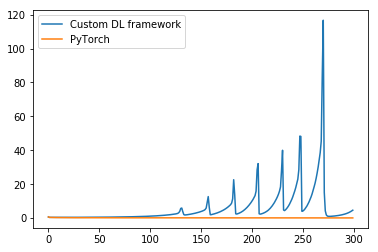

In [16]:
import matplotlib.pyplot as plt
plt.plot(loss_history_mnist, label='Custom DL framework')
plt.plot(loss_history_mnist_torch, label='PyTorch')
plt.legend()
plt.show()

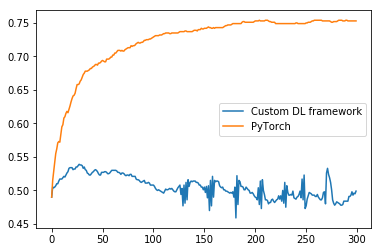

In [17]:
import matplotlib.pyplot as plt
plt.plot(test_acc_history_mnist, label='Custom DL framework')
plt.plot(test_acc_history_mnist_torch, label='PyTorch')
plt.legend()
plt.show()